In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
import datetime
import seaborn as sns

In [2]:
def all_data(directory):
    t = 0
    for file in os.listdir(directory):
        if file[-3:] == 'csv' and t == 0:
            t = t + 1
            df = pd.read_csv(file,low_memory=False)
        elif file[-3:] == 'csv':
            df = df.append(pd.read_csv(file,low_memory=False))
    
    df = df.reset_index()
    df = df.iloc[:,1:]
    return(df)

df = all_data(os.getcwd())

In [3]:
os.getcwd()

'E:\\jupyter\\bigdata\\HW1'

# 1

In [5]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [6]:
pick = df[['PULocationID','DOLocationID']]
np_pick = pick.values

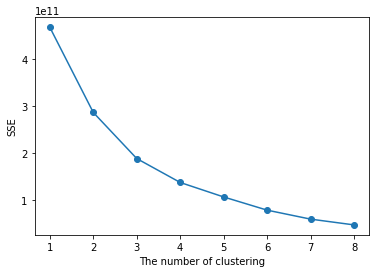

In [7]:
SSE = []  
for k in range(1, 9):
    estimator = KMeans(n_clusters = k)  
    estimator.fit(np_pick)
    SSE.append(estimator.inertia_)
X = range(1, 9)

plt.xlabel('The number of clustering')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

In [17]:
k = 3
km = KMeans(n_clusters = k).fit(np_pick)
y = km.labels_

In [18]:
np.sum(y==0)

15043455

In [19]:
np.sum(y==1)

18844810

In [20]:
np.sum(y==2)

16588977

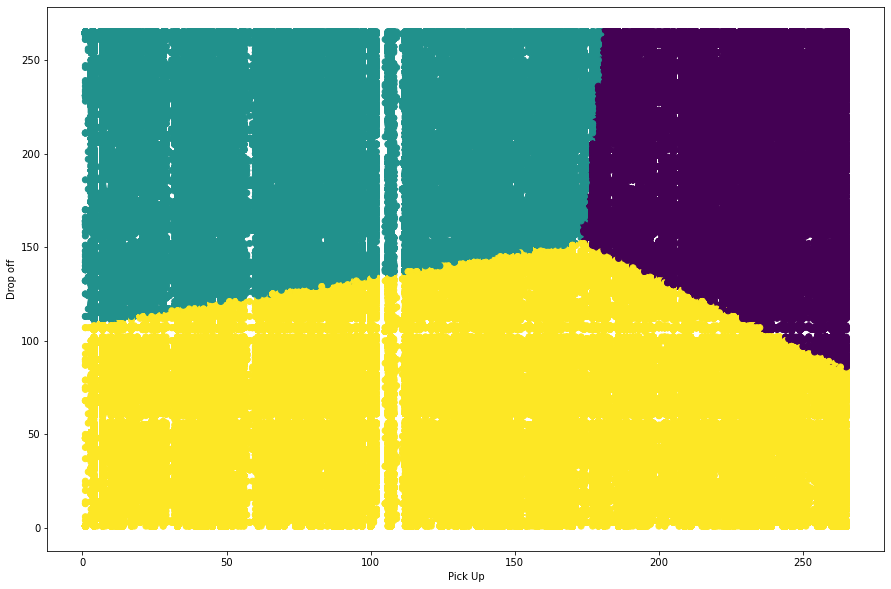

In [21]:
plt.figure(figsize = (15, 10))
plt.xlabel('Pick Up')
plt.ylabel('Drop off')
plt.scatter(np_pick[:,0], np_pick[:,1], c = y)
plt.show()

In [22]:
pick['PULocationID'].value_counts().index

Int64Index([237, 161, 236, 186, 162, 230, 132,  48, 170, 142,
            ...
             84, 245, 172, 105,  30,   2, 204, 176,  99, 199],
           dtype='int64', length=262)

In [23]:
pick['DOLocationID'].value_counts().index

Int64Index([236, 237, 161, 170, 230, 162,  48, 142, 186, 239,
            ...
             59, 176, 204,  30,  99,   2, 105, 199, 110, 104],
           dtype='int64', length=264)

# 2

In [24]:
df['tpep_pickup_datetime'][0]

'2019-08-01 00:09:46'

In [25]:
datetime.datetime.strptime(df['tpep_pickup_datetime'][0],"%Y-%m-%d %H:%M:%S").hour

0

In [26]:
pickup_dt = pd.to_datetime(df['tpep_pickup_datetime'])

In [27]:
pickup_dt.dt.hour.value_counts()

18    3348414
19    3115103
17    3077500
15    2901377
14    2868964
20    2810712
21    2755215
16    2738697
13    2724490
12    2691619
22    2531217
11    2513766
10    2389405
9     2355080
8     2306341
23    1994968
7     1838304
0     1445461
6     1021417
1     1009681
2      701623
3      494292
5      455404
4      388192
Name: tpep_pickup_datetime, dtype: int64

# 3

In [28]:
pd.Series.sort_values(df['trip_distance'])

33598682    -37264.53
26723200    -18739.24
26731962       -34.94
26727149       -34.67
33595911       -34.44
              ...    
49310771    210148.62
40027910    210240.07
50466718    220386.23
49309017    269803.73
49869760    297004.51
Name: trip_distance, Length: 50477242, dtype: float64

In [40]:
len(df[df['trip_distance']<0])

11440

In [29]:
pd.Series.sort_values(df['trip_distance'].value_counts())

 701.30         1
-29.53          1
 113.94         1
 109.31         1
 109.94         1
            ...  
 1.10      872807
 0.70      873661
 1.00      909873
 0.80      919516
 0.90      924660
Name: trip_distance, Length: 9122, dtype: int64

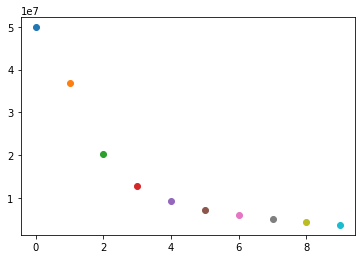

In [30]:
for n,i in enumerate(range(0,10)):
    plt.scatter(n,sum(df['trip_distance']>i))

In [4]:
df[(df.trip_distance<=4) & (df.trip_distance>0)][['passenger_count','fare_amount','extra','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge']].describe()

,passenger_count,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,4.060140e+07,4.072277e+07,4.072277e+07,4.072277e+07,4.072277e+07,4.072277e+07,4.072277e+07,4.072277e+07
mean,1.528568e+00,9.079897e+00,1.138824e+00,1.679452e+00,1.433639e-02,2.982962e-01,1.425319e+01,2.359909e+00
std,1.170344e+00,1.052851e+02,1.242133e+00,1.625791e+00,5.513633e-01,3.153146e-02,1.053359e+02,5.996777e-01
min,0.000000e+00,-1.472000e+03,-2.700000e+01,-4.932200e+02,-4.000000e+01,-3.000000e-01,-1.472800e+03,-2.500000e+00
25%,1.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e-01,1.080000e+01,2.500000e+00
50%,1.000000e+00,8.500000e+00,5.000000e-01,1.800000e+00,0.000000e+00,3.000000e-01,1.350000e+01,2.500000e+00
75%,2.000000e+00,1.100000e+01,2.500000e+00,2.560000e+00,0.000000e+00,3.000000e-01,1.680000e+01,2.500000e+00
max,9.000000e+00,6.711001e+05,1.130100e+02,1.100000e+03,9.255000e+02,3.000000e-01,6.711032e+05,3.000000e+00


In [31]:
long_dist = df[df.trip_distance>4]
short_dist = df[df.trip_distance<=4]

In [70]:
df[df.trip_distance>4][['passenger_count','fare_amount','extra','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge']].describe()

,passenger_count,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,8.847038e+06,9.202502e+06,9.202502e+06,9.202502e+06,9.202502e+06,9.202502e+06,9.202502e+06,9.202501e+06
mean,1.557491e+00,3.116530e+01,1.091638e+00,4.555149e+00,1.953781e+00,2.988439e-01,4.088740e+01,1.955242e+00
std,1.183666e+00,1.452427e+02,1.351344e+00,4.767479e+00,3.573270e+00,2.562990e-02,1.458054e+02,1.038708e+00
min,0.000000e+00,-1.259000e+03,-5.500000e+00,-6.692000e+01,-4.050000e+01,-3.000000e-01,-1.260300e+03,-2.500000e+00
25%,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e-01,2.630000e+01,2.500000e+00
50%,1.000000e+00,2.600000e+01,5.000000e-01,4.250000e+00,0.000000e+00,3.000000e-01,3.455000e+01,2.500000e+00
75%,2.000000e+00,3.900000e+01,2.500000e+00,7.000000e+00,6.120000e+00,3.000000e-01,5.130000e+01,2.500000e+00
max,9.000000e+00,4.110420e+05,9.006000e+01,8.000000e+02,9.117500e+02,3.000000e-01,4.110428e+05,2.750000e+00


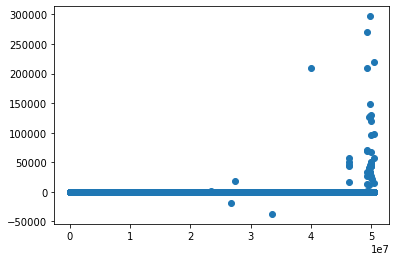

In [34]:
np_d = np.array(df['trip_distance'])
plt.scatter([i for i in range(len(np_d))],np_d)

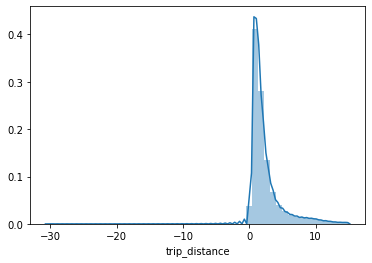

In [204]:
sns.distplot(df.trip_distance[df['trip_distance']<15], hist = True)

In [20]:
np_d = np.array(df['trip_distance'])